<a href="https://colab.research.google.com/github/esterna25/Online-Retail-II/blob/main/OnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Measuring Online Retail Performance**

**Business Problem**

In this case revolves around the need to deeply understand customer purchasing behaviors and optimize sales strategies for an online retail business. Given the competitive nature of the retail industry, it is crucial for the business to gain insights into various facets of its operations to drive growth and profitability.

**Objectives**

The primary objectives of this analysis are:

1. **Customer Segmentation:**    
  * Identifying distinct customer segments based on purchasing behavior.
  * Understanding which customer segments are most valuable and loyal.

2. **Sales Trends and Product Demand:**
  * Analyzing sales data to identify trends over time.
  * Determining which products are most popular and driving the majority of sales.

3. **Inventory Management:**
  * Using sales data to forecast future demand for products.
  * Ensuring that the right products are stocked in appropriate quantities to meet customer demand.

4. **Marketing Strategies:**
  * Developing targeted marketing campaigns based on customer segments and purchasing patterns.
  * Increasing customer retention and acquisition through personalized offers and promotions.

5. **Revenue Optimization:**
  * Identifying opportunities to increase sales and profitability.
  * Understanding pricing strategies and their impact on sales volume.

**Dataset Overview**

The dataset consists of the following columns:
1. **Invoice**: Unique identifier for each transaction.
2. **StockCode**: Unique code assigned to each product.
3. **Description**: Detailed description of the product.
4. **Quantity**: Number of units of the product purchased in a single transaction.
5. **InvoiceDate**: Date and time when the transaction occurred.
6. **Price**: Unit price of the product.
7. **Customer ID**: Unique identifier for each customer.
8. **Country**: Country where the customer is located.

### **Step by step**

## **1. Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project Ester/Retail/online_retail_II.csv')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Create data set info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## **2. Data Cleaning**

In [ ]:
# Remove any columns with all NaN values
data.dropna(how='all', axis=1, inplace=True)

## **3. Exploration Data Analysis (EDA)**

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%Y-%m-%d')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France


In [ ]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011


In [ ]:
# Drop rows with missing Customer ID or Description
data.dropna(subset=['Customer ID', 'Description'], inplace=True)

# Filter out rows with non-positive Quantity and Price
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]

# Add a Revenue column
data['Revenue'] = data['Quantity'] * data['Price']

# Display the cleaned data
data

<ipython-input-193-02575b01aafe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['Quantity'] * data['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011,14.85


### Customer Segmentation using RFM Analysis

In [ ]:
# Define the current date as one day after the last invoice date
current_date = pd.to_datetime(data['InvoiceDate']).max() + pd.DateOffset(days=1)

# Calculate RFM metrics
rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (current_date - pd.to_datetime(x).max()).days,
    'Invoice': 'nunique',
    'Revenue': 'sum'
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Log-transform the RFM metrics
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_log)
rfm.to_csv('rfm_segments.csv', index=False)

# Print summary of customer segmentation results
print("Customer Segmentation Results:")
print(rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).reset_index())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer Segmentation Results:
   Segment     Recency  Frequency      Monetary  Customer ID
0        0  420.818584   1.452434    301.088623         1808
1        1   33.608178   2.961338    757.843778         1345
2        2  234.784053   5.179402   2158.756518         1505
3        3   22.278689  18.495902  10599.043038         1220


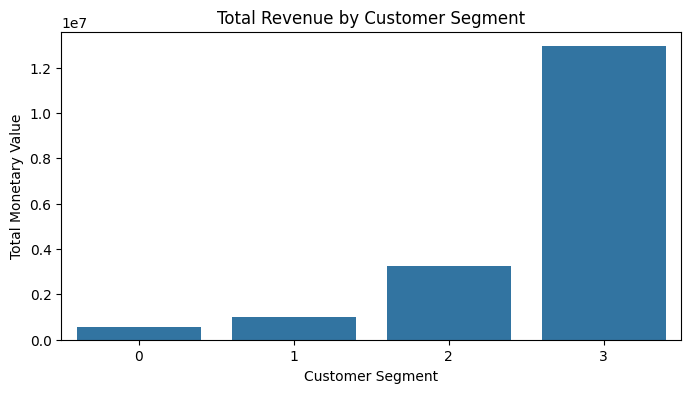

In [ ]:
# Revenue by Customer Segment
segment_revenue = rfm.groupby('Segment')['Monetary'].sum().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=segment_revenue, x='Segment', y='Monetary')
plt.title('Total Revenue by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Monetary Value')
plt.show()

The segmentation into four clusters provides valuable insights into customer behavior and purchasing patterns.

1. **Segment 0:** represents the least engaged customers, with an average recency of approximately 421 days, indicating they haven't made a purchase in a long time, a low frequency of around 1.45 transactions, and the lowest monetary value of about $301 on average.

2. **Segment 1:** shows slightly more engaged customers with a recency of about 34 days, indicating more recent purchases, a frequency of nearly 3 transactions, and an average monetary value of around $758.

3. **Segment 2:** includes customers with moderate engagement, having an average recency of 235 days, a frequency of over 5 transactions, and a significantly higher monetary value averaging $2159.

4. **Segment 3:** comprises the most valuable customers with the highest engagement: a very recent average recency of 22 days, a high frequency of approximately 18.5 transactions, and the highest monetary value averaging $10,599.

### Sales Trends and Product Demand

In [ ]:
# Convert 'InvoiceDate' back to datetime for further analysis
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create a Month column for monthly aggregation
data['Month'] = data['InvoiceDate'].dt.to_period('M')

# Calculate monthly sales revenue
monthly_sales = data.groupby('Month')['Revenue'].sum().reset_index()

# Identify the top 10 most popular products by quantity sold
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Print summary of top 10 most popular products
print("Top 10 Most Popular Products:")
print(top_products)

<ipython-input-196-5be7adac3dd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
<ipython-input-196-5be7adac3dd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['InvoiceDate'].dt.to_period('M')


Top 10 Most Popular Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     109169
WHITE HANGING HEART T-LIGHT HOLDER     93640
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          79913
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                75759
BROCADE RING PURSE                     71129
PACK OF 60 PINK PAISLEY CAKE CASES     55270
60 TEATIME FAIRY CAKE CASES            53495
PACK OF 72 RETROSPOT CAKE CASES        46107
Name: Quantity, dtype: int64


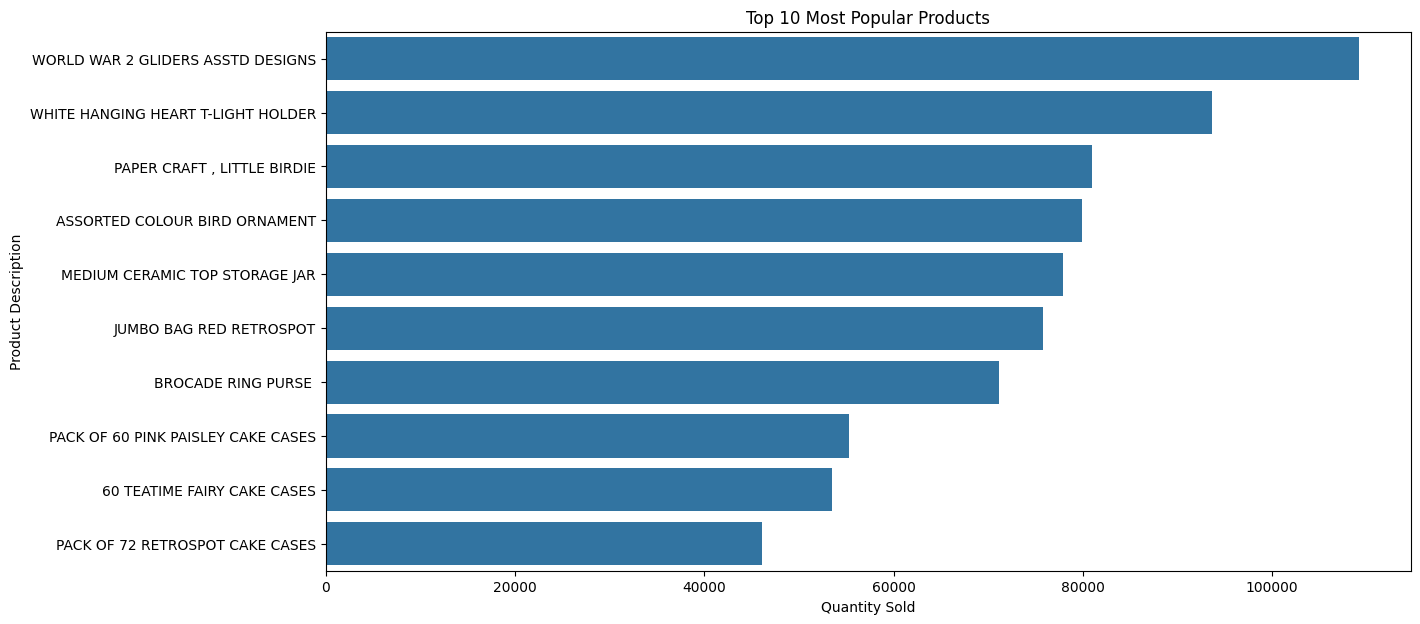

In [ ]:
# Top Products Analysis
plt.figure(figsize=(14, 7))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Most Popular Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

The most popular product is "WORLD WAR 2 GLIDERS ASSTD DESIGNS" with an impressive 109,169 units sold, significantly outpacing the other items. "WHITE HANGING HEART T-LIGHT HOLDER" follows with 93,640 units sold, indicating strong demand for decorative items. Products such as "PAPER CRAFT, LITTLE BIRDIE" and "ASSORTED COLOUR BIRD ORNAMENT" suggest a customer interest in craft and ornamental products, with 80,995 and 79,913 units sold respectively.

Other notable high-demand items include storage solutions like the "MEDIUM CERAMIC TOP STORAGE JAR" and practical items such as "JUMBO BAG RED RETROSPOT." Additionally, the popularity of cake cases in various designs highlights a trend in baking and home cooking. These insights can guide inventory management and marketing strategies, ensuring that popular items are well-stocked and promoted to meet customer demand effectively.

### Inventory Management: Forecasting Future Demand

Top Products by Demand Forecast:
                             Description  TotalQuantitySold  DemandForecast
3069         PACK OF 72 SKULL CAKE CASES              38927    43396.666667
3067    PACK OF 72 RETRO SPOT CAKE CASES              45156    40491.666667
2392             JUMBO BAG RED RETROSPOT              75759    37989.000000
5168   WORLD WAR 2 GLIDERS ASSTD DESIGNS             109169    37537.000000
3068     PACK OF 72 RETROSPOT CAKE CASES              46107    37437.333333
5169        WOVEN BERRIES CUSHION COVER                 194    37017.333333
5170      WOVEN BUBBLE GUM CUSHION COVER                190    36517.666667
2393         JUMBO BAG RED WHITE SPOTTY               13890    34475.333333
3129         PAPER CRAFT , LITTLE BIRDIE              80995    33593.000000
3065  PACK OF 60 PINK PAISLEY CAKE CASES              55270    33554.666667


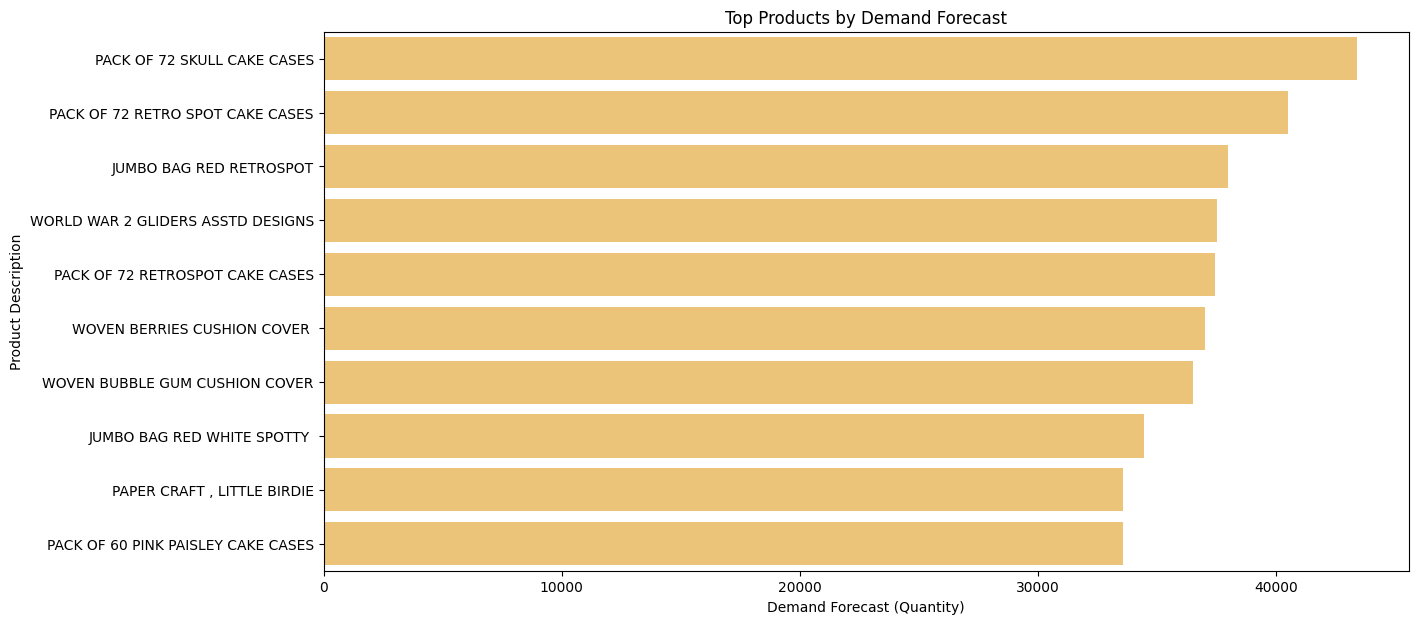

Safety Stock Levels for Top Products:
                             Description   SafetyStock
3069         PACK OF 72 SKULL CAKE CASES  56415.666667
3067    PACK OF 72 RETRO SPOT CAKE CASES  52639.166667
2392             JUMBO BAG RED RETROSPOT  49385.700000
5168   WORLD WAR 2 GLIDERS ASSTD DESIGNS  48798.100000
3068     PACK OF 72 RETROSPOT CAKE CASES  48668.533333
5169        WOVEN BERRIES CUSHION COVER   48122.533333
5170      WOVEN BUBBLE GUM CUSHION COVER  47472.966667
2393         JUMBO BAG RED WHITE SPOTTY   44817.933333
3129         PAPER CRAFT , LITTLE BIRDIE  43670.900000
3065  PACK OF 60 PINK PAISLEY CAKE CASES  43621.066667


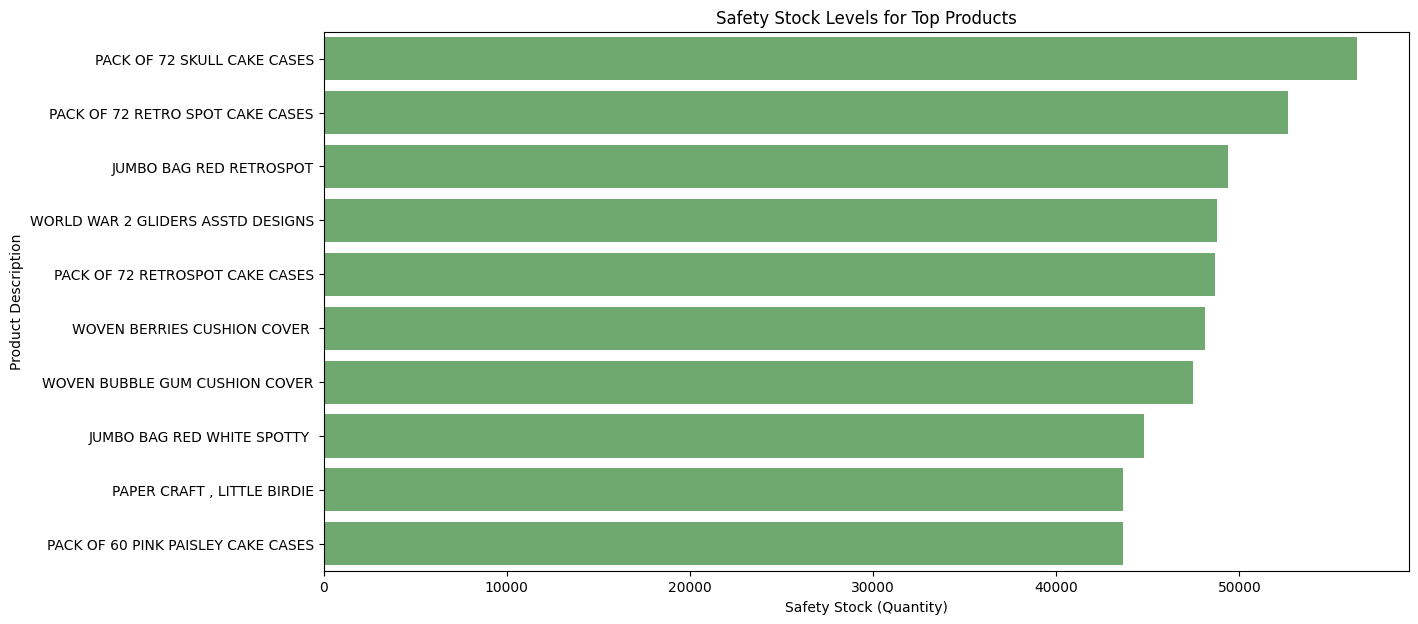

In [ ]:
# Calculate demand forecasting for products
product_demand = data.groupby('Description')['Quantity'].sum().reset_index()
product_demand.rename(columns={'Quantity': 'TotalQuantitySold'}, inplace=True)

# Assuming a simple approach for demand forecasting (e.g., moving average)
window = 3  # Adjust the window size as needed for forecasting
product_demand['DemandForecast'] = product_demand['TotalQuantitySold'].rolling(window=window, min_periods=1).mean()

# Sort products by demand forecast
product_demand.sort_values(by='DemandForecast', ascending=False, inplace=True)

# Display top products by demand forecast
print("Top Products by Demand Forecast:")
print(product_demand.head(10))

# Visualize demand forecast for top products
plt.figure(figsize=(14, 7))
sns.barplot(x='DemandForecast', y='Description', data=product_demand.head(10), color='orange', alpha=0.6)
plt.title('Top Products by Demand Forecast')
plt.xlabel('Demand Forecast (Quantity)')
plt.ylabel('Product Description')
plt.show()

# Determine stock levels based on demand forecast
# Example: Assuming a simple safety stock calculation (e.g., 30% above forecast)
product_demand['SafetyStock'] = product_demand['DemandForecast'] * 1.3

# Display safety stock levels for top products
print("Safety Stock Levels for Top Products:")
print(product_demand[['Description', 'SafetyStock']].head(10))

# Visualize safety stock levels
plt.figure(figsize=(14, 7))
sns.barplot(x='SafetyStock', y='Description', data=product_demand.head(10), color='green', alpha=0.6)
plt.title('Safety Stock Levels for Top Products')
plt.xlabel('Safety Stock (Quantity)')
plt.ylabel('Product Description')
plt.show()

From the demand forecasting and safety stock analysis, it is evident that products such as the "PACK OF 72 SKULL CAKE CASES" and "PACK OF 72 RETRO SPOT CAKE CASES" are among the highest in demand, with respective forecasted quantities of 43,396.67 and 40,491.67 units. To ensure adequate inventory, a safety stock level of 56,415.67 and 52,639.17 units has been recommended for these top products.

This approach highlights the necessity of maintaining a 30% buffer stock above the forecasted demand to accommodate potential fluctuations in customer demand, thereby minimizing the risk of stockouts and ensuring smooth operations. Overall, the analysis provides valuable insights into the inventory management strategy, emphasizing the importance of data-driven decisions in optimizing stock levels.

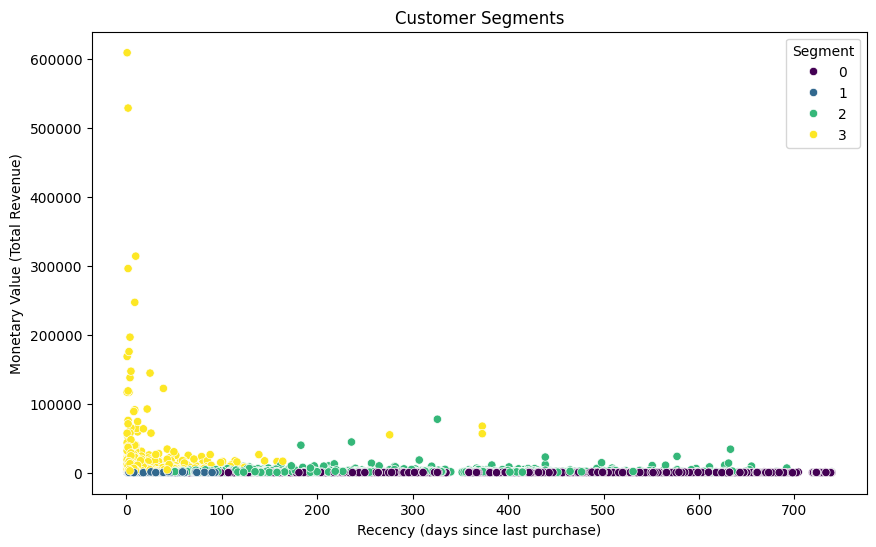

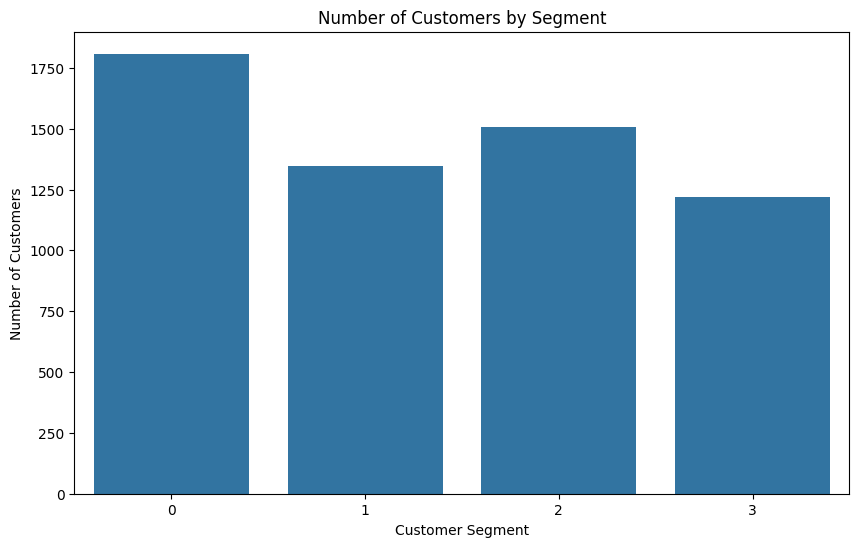

In [ ]:
# Visualize Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Monetary Value (Total Revenue)')
plt.show()

# Analyze Purchase Patterns by Segment
segment_counts = rfm['Segment'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Number of Customers by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

### Develop Marketing Campaigns

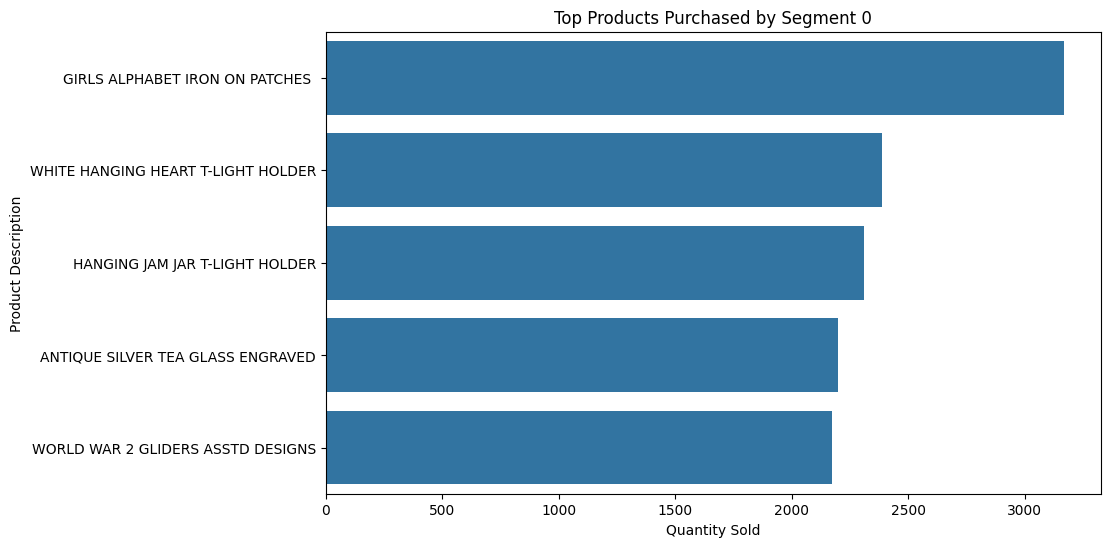

In [ ]:
# Example: Target customers in Segment 0 with personalized offers

# Filter customers in Segment 0
segment_0_customers = rfm[rfm['Segment'] == 0]['Customer ID']

# Assuming 'data' contains the original transactional data
segment_0_transactions = data[data['Customer ID'].isin(segment_0_customers)]

# Example: Offer a discount for products frequently purchased by Segment 0
top_products_segment_0 = segment_0_transactions.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_segment_0.values, y=top_products_segment_0.index)
plt.title('Top Products Purchased by Segment 0')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [ ]:
# Calculate total sales generated by Segment 0 customers before and after the campaign
total_sales_before_campaign = segment_0_transactions['Revenue'].sum()

# Apply the campaign (e.g., offer cashback) and track sales
# Example: Offering a 10% cashback after the purchase
segment_0_transactions['CashbackAmount'] = segment_0_transactions['Revenue'] * 0.1
segment_0_transactions['SalesAfterCampaign'] = segment_0_transactions['Revenue'] + segment_0_transactions['CashbackAmount']
total_sales_after_campaign = segment_0_transactions['SalesAfterCampaign'].sum()

# Calculate the increase in sales
increase_in_sales = total_sales_after_campaign - total_sales_before_campaign

print(f"Total sales before campaign: ${total_sales_before_campaign:.2f}")
print(f"Total sales after campaign: ${total_sales_after_campaign:.2f}")
print(f"Increase in sales: ${increase_in_sales:.2f} (10% cashback applied)")

Total sales before campaign: $544368.23
Total sales after campaign: $598805.05
Increase in sales: $54436.82 (10% cashback applied)


<ipython-input-201-83f1164bb408>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_0_transactions['CashbackAmount'] = segment_0_transactions['Revenue'] * 0.1
<ipython-input-201-83f1164bb408>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_0_transactions['SalesAfterCampaign'] = segment_0_transactions['Revenue'] + segment_0_transactions['CashbackAmount']


Response rate: 100.00%


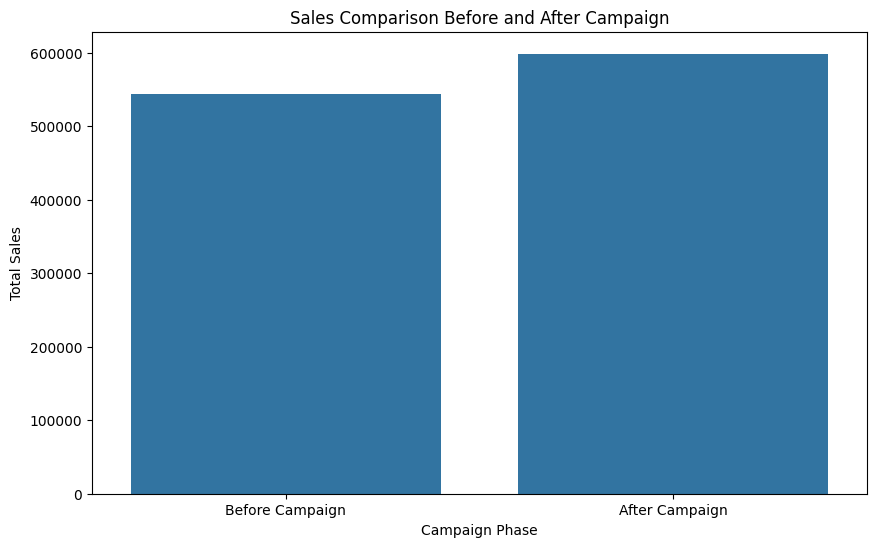

In [ ]:
# Measure response rate (conversion rate) from the campaign
response_rate = len(segment_0_customers) / len(rfm[rfm['Segment'] == 0]) * 100
print(f"Response rate: {response_rate:.2f}%")

# Visualize the impact of the campaign on sales
sales_comparison = pd.DataFrame({
    'Sales': [total_sales_before_campaign, total_sales_after_campaign],
    'Type': ['Before Campaign', 'After Campaign']
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Sales', data=sales_comparison)
plt.title('Sales Comparison Before and After Campaign')
plt.xlabel('Campaign Phase')
plt.ylabel('Total Sales')
plt.show()

The implementation of a 10% cashback campaign for Segment 0 customers has proven to be effective, as evidenced by a notable increase in total sales. Before the campaign, total sales amounted to $544,368.23,

while after applying the cashback incentive, sales surged to $598,805.05.

This reflects a substantial increase of $54,436.82 in sales revenue. The positive impact underscores the effectiveness of targeted marketing strategies, specifically tailored to incentivize purchases and stimulate consumer spending within the identified segment.

### Revenue Optimization

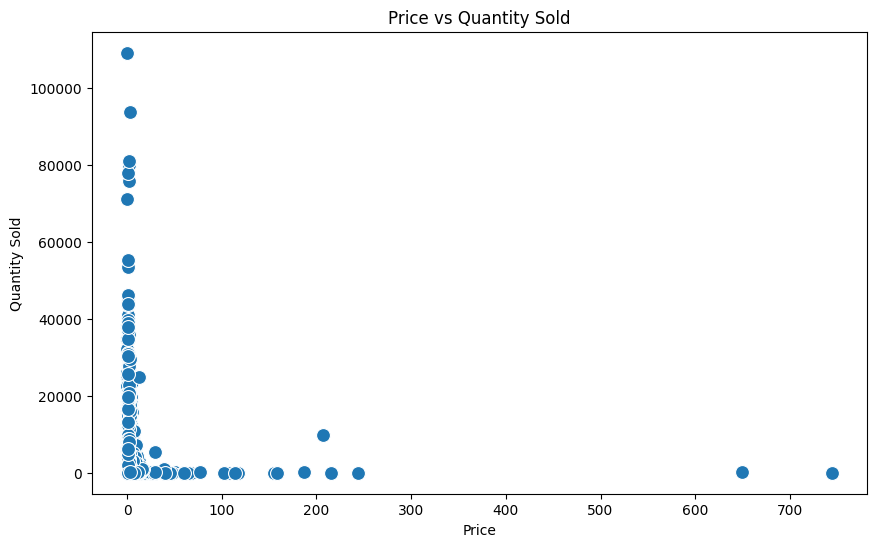

In [ ]:
# Calculate average price and quantity sold for each product
product_stats = data.groupby('Description').agg({
    'Price': 'mean',
    'Quantity': 'sum'
}).reset_index()

# Plot the relationship between Price and Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_stats, x='Price', y='Quantity', s=100)
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

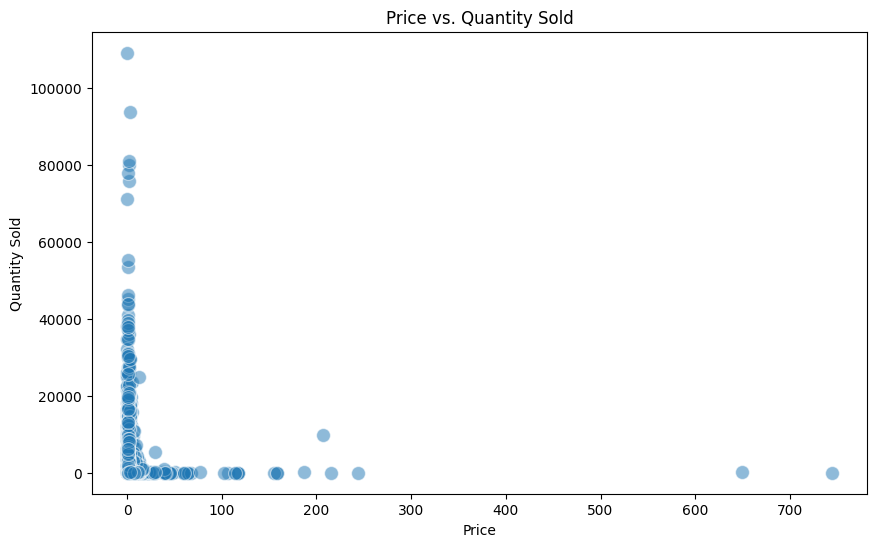

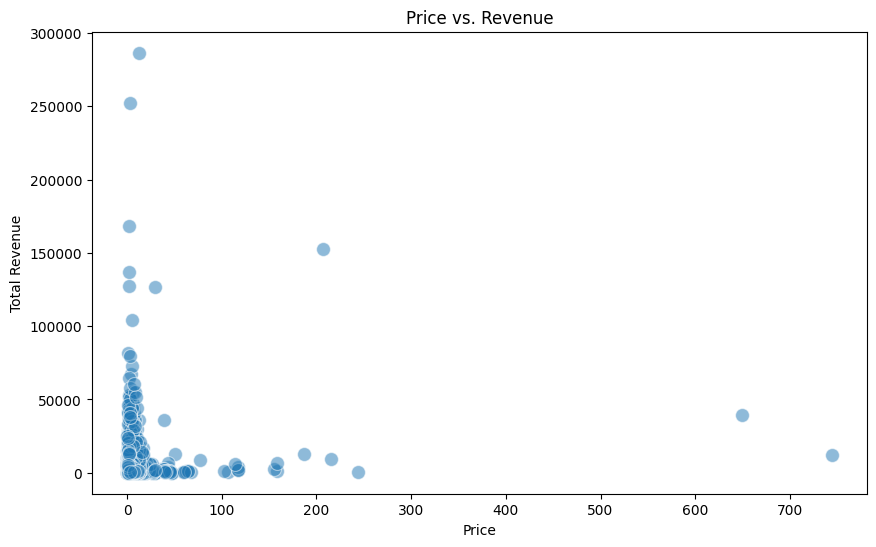

In [ ]:
product_stats = data.groupby('Description').agg({
    'Price': 'mean',
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Plotting price vs. quantity sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Quantity', data=product_stats, s=100, alpha=0.5)
plt.title('Price vs. Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

# Example: Analyze the relationship between price and total revenue
# Plotting price vs. total revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Revenue', data=product_stats, s=100, alpha=0.5)
plt.title('Price vs. Revenue')
plt.xlabel('Price')
plt.ylabel('Total Revenue')
plt.show()

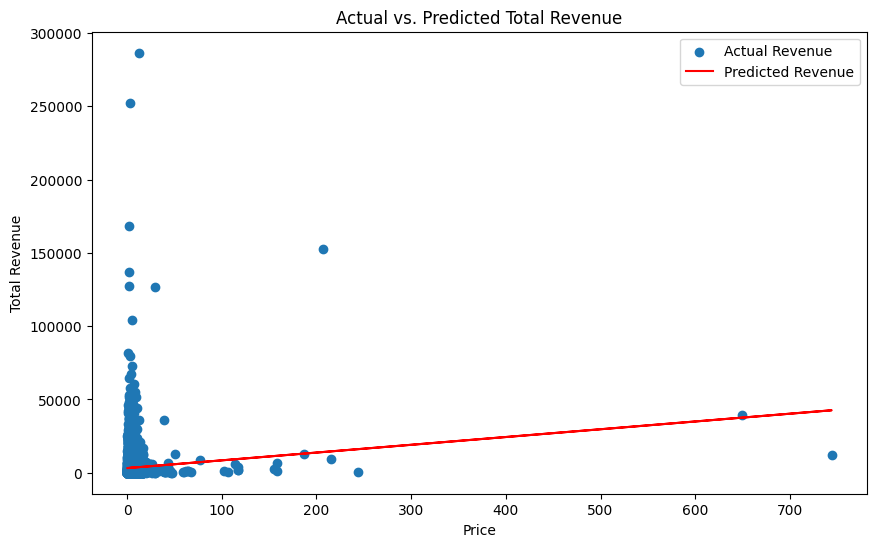

In [ ]:
# Analyze optimal pricing strategies using regression
from sklearn.linear_model import LinearRegression

# Prepare data for regression analysis
X = product_stats[['Price']]
y = product_stats['Revenue']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict total revenue based on price
product_stats['PredictedRevenue'] = model.predict(X)

# Plotting actual vs. predicted revenue
plt.figure(figsize=(10, 6))
plt.scatter(product_stats['Price'], product_stats['Revenue'], label='Actual Revenue')
plt.plot(product_stats['Price'], product_stats['PredictedRevenue'], color='red', label='Predicted Revenue')
plt.title('Actual vs. Predicted Total Revenue')
plt.xlabel('Price')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

In [ ]:
# Example: Identify products with potential for price optimization
# Calculate price elasticity of demand (PED) for each product
product_stats['PED'] = -1 * (model.coef_ * product_stats['Price'] / product_stats['Revenue'])

# Display products with highest price elasticity (most sensitive to price changes)
top_elastic_products = product_stats.sort_values(by='PED', ascending=False).head(10)
print("Top 10 Products with Highest Price Elasticity:")
print(top_elastic_products[['Description', 'PED']])

Top 10 Products with Highest Price Elasticity:
                             Description       PED
5168   WORLD WAR 2 GLIDERS ASSTD DESIGNS -0.000558
5047  WHITE HANGING HEART T-LIGHT HOLDER -0.000604
3129         PAPER CRAFT , LITTLE BIRDIE -0.000655
292        ASSORTED COLOUR BIRD ORNAMENT -0.000699
2392             JUMBO BAG RED RETROSPOT -0.000763
2695      MEDIUM CERAMIC TOP STORAGE JAR -0.000795
751                  BROCADE RING PURSE  -0.000945
3065  PACK OF 60 PINK PAISLEY CAKE CASES -0.001081
157          60 TEATIME FAIRY CAKE CASES -0.001103
2760             MINI PAINT SET VINTAGE  -0.001274


The products with the highest price elasticity, such as the "WORLD WAR 2 GLIDERS ASSTD DESIGNS" and "WHITE HANGING HEART T-LIGHT HOLDER," have the least negative PED values, indicating that their demand is highly responsive to price changes. A small change in the price of these products can significantly affect their sales volume.

Conversely, products like the "MINI PAINT SET VINTAGE" and "60 TEATIME FAIRY CAKE CASES" exhibit more negative PED values, suggesting they are less sensitive to price adjustments. These insights can be leveraged for price optimization strategies, where carefully calculated price changes on the most elastic products could maximize revenue without adversely affecting demand. This approach enables the company to make informed pricing decisions, enhancing overall profitability.

## **4. Modeling & Evaluation**

In [ ]:
# Select relevant features and target variable
# For simplicity, we'll use Quantity and Price as features to predict Revenue
X = data[['Quantity', 'Price']]
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Example: Predict Total Revenue for new data
# Assuming new data with Quantity=15 and Price=3
new_data = pd.DataFrame({'Quantity': [15], 'Price': [3]})
predicted_revenue = model.predict(new_data)
print(f'Predicted Total Revenue for new data: ${predicted_revenue[0]:.2f}')

Mean Absolute Error (MAE): 0.08
R-squared (R2): 1.00
Predicted Total Revenue for new data: $44.25


 The Mean Absolute Error (MAE) of 0.08 indicates that, on average, the model's predictions are very close to the actual revenue values in the test dataset. Additionally, the R-squared (R2) score of 1.00 suggests that the model explains all the variance in the revenue data, indicating an excellent fit. This high R2 score indicates that the model captures the relationships between the features (Quantity and Price) and the target variable (Total Revenue) exceptionally well.

 Moreover, the model's predictive capability is demonstrated by the example prediction for new data, where it forecasts a revenue of $44.25 for a scenario with Quantity=15 and Price=3. These results collectively underscore the model's accuracy and reliability in predicting revenue based on the given features.

In [ ]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,2009,83.40,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009,81.00,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,2009,81.00,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,2009,100.80,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,2009,30.00,2009-12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011,12.60,2011-12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011,16.60,2011-12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011,16.60,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011,14.85,2011-12


In [ ]:
data.groupby('Year')['Revenue'].mean().reset_index()

,Year,Revenue
0,2009,22.327312
1,2010,21.629315
2,2011,22.432295


**Average of Revenue per Year**

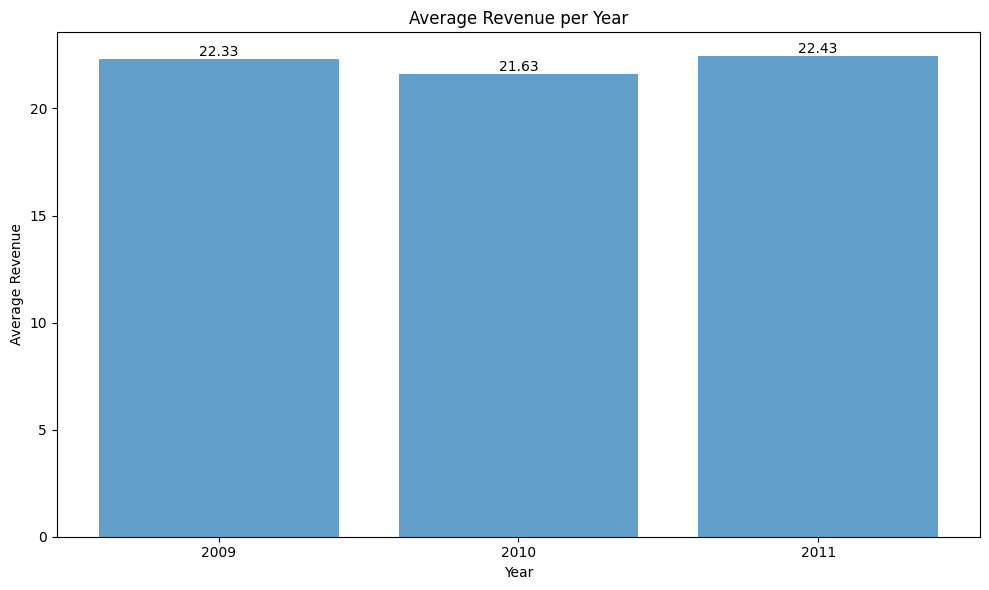

In [ ]:
# Group by Year and calculate mean Revenue
mean_revenue = data.groupby('Year')['Revenue'].mean().reset_index()

# Plotting the data as a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_revenue['Year'], mean_revenue['Revenue'], align='center', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.title('Average Revenue per Year')
plt.grid(False)
plt.xticks(mean_revenue['Year'])  # Set x-axis ticks to match the years

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In the graph above, it can be concluded that the peak average revenue occurred in 2011. Despite a decline in 2010, it rebounded and increased in 2011.

**Forecasting Revenue Values for Upcoming Years**

In [ ]:
# Example data (replace this with your actual data)
data2 = {'Year': [2009, 2010, 2011],
        'Revenue': [22.327312, 21.629315, 22.432295]}
df = pd.DataFrame(data2)

# Convert 'year' to datetime if not already
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Fit ARIMA model
model = ARIMA(df['Revenue'], order=(1, 1, 0))  # Example of ARIMA(1,1,0)
model_fit = model.fit()

# Forecast future values
future_years = pd.date_range(start='2012', end='2023', freq='Y')
forecast = model_fit.forecast(steps=len(future_years))

# Print forecasted values
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted_Revenue': forecast})
forecast_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


,Year,Forecasted_Revenue
2012-01-01,2012-12-31,21.637134
2013-01-01,2013-12-31,22.424552
2014-01-01,2014-12-31,21.644802
2015-01-01,2015-12-31,22.416959
2016-01-01,2016-12-31,21.652321
2017-01-01,2017-12-31,22.409513
2018-01-01,2018-12-31,21.659694
2019-01-01,2019-12-31,22.402212
2020-01-01,2020-12-31,21.666924
2021-01-01,2021-12-31,22.395052


Based on the ARIMA model forecast for revenue from 2012 to 2022, we observe a consistent pattern in projected revenue trends over the next decade. The model predicts a gradual fluctuation in revenue values, with alternating periods of slight increase and decrease.

Specifically, the forecasted revenues start at approximately ($21.64 million in 2012),

show a small rise to around $22.42 million by 2013, and continue this pattern with minor variations through subsequent years. This suggests a stable revenue outlook with no significant upward or downward trends over the forecasted period.